In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d rizwan123456789/potato-disease-leaf-datasetpld

 99% 37.0M/37.4M [00:01<00:00, 36.8MB/s]
100% 37.4M/37.4M [00:01<00:00, 25.6MB/s]


In [ ]:
from zipfile import ZipFile


zf = ZipFile('potato-disease-leaf-datasetpld.zip')
zf.extractall()
zf.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_data_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True
)

val_data_gen = ImageDataGenerator(rescale=1./255)

train_data = train_data_gen.flow_from_directory('PLD_3_Classes_256/Training',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')
val_data = val_data_gen.flow_from_directory('PLD_3_Classes_256/Validation',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')
test_data = val_data_gen.flow_from_directory('PLD_3_Classes_256/Testing',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 3251 images belonging to 3 classes.
Found 416 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


In [ ]:
val_data[0][0].shape

(32, 224, 224, 3)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy


In [ ]:
vgg3 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape= (224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

vgg3.compile(
    loss = CategoricalCrossentropy(),
    optimizer = Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

history = vgg3.fit(train_data, epochs=15, steps_per_epoch=len(train_data),
        validation_data=val_data, validation_steps=len(val_data))

Epoch 1/15
102/102 [==============================] - 45s 411ms/step - loss: 1.0278 - accuracy: 0.4460 - val_loss: 0.9304 - val_accuracy: 0.5120
Epoch 2/15
102/102 [==============================] - 41s 404ms/step - loss: 0.8909 - accuracy: 0.6054 - val_loss: 0.9306 - val_accuracy: 0.5481
Epoch 3/15
102/102 [==============================] - 40s 396ms/step - loss: 0.8594 - accuracy: 0.6149 - val_loss: 0.8956 - val_accuracy: 0.6010
Epoch 4/15
102/102 [==============================] - 40s 396ms/step - loss: 0.7358 - accuracy: 0.6890 - val_loss: 0.8088 - val_accuracy: 0.6755
Epoch 5/15
102/102 [==============================] - 41s 405ms/step - loss: 0.6728 - accuracy: 0.7250 - val_loss: 0.5679 - val_accuracy: 0.7861
Epoch 6/15
102/102 [==============================] - 40s 395ms/step - loss: 0.6757 - accuracy: 0.7339 - val_loss: 0.7172 - val_accuracy: 0.6827
Epoch 7/15
102/102 [==============================] - 40s 396ms/step - loss: 0.7583 - accuracy: 0.6739 - val_loss: 0.8981 - val_ac

In [ ]:
vgg3.evaluate(test_data)

13/13 [==============================] - 1s 88ms/step - loss: 0.1948 - accuracy: 0.9284


[0.19481322169303894, 0.9283950328826904]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_loss(history):
  df = pd.DataFrame(history.history)
  df[['loss', 'accuracy']].plot()

  plt.figure()
  df[['val_loss', 'val_accuracy']].plot()

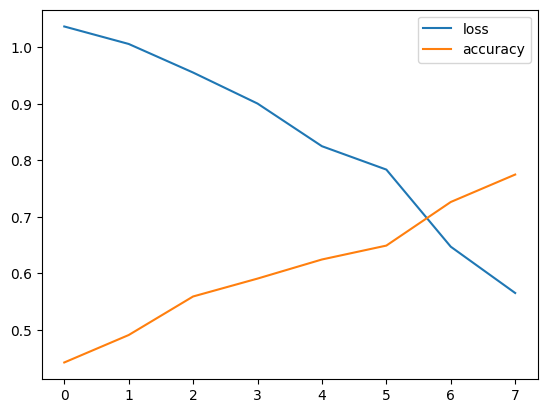

<Figure size 640x480 with 0 Axes>

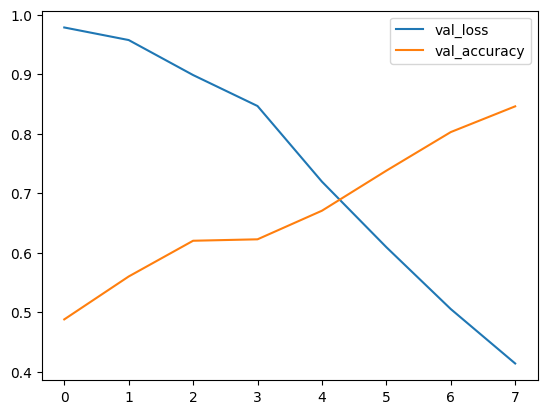

In [ ]:
plot_loss(history)

In [ ]:
import tensorflow_hub as hub


url = "https://www.kaggle.com/models/tensorflow/efficientnet/frameworks/TensorFlow2/variations/b0-classification/versions/1"
efficien_net_feature_extractor = hub.KerasLayer(url,
                                                trainable=False,
                                                input_shape= (224, 224)+(3,))

In [ ]:
efficient_net = Sequential([
    efficien_net_feature_extractor,
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

efficient_net.compile(
    loss = CategoricalCrossentropy(),
    optimizer = Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

history = efficient_net.fit(train_data, epochs=15, steps_per_epoch=len(train_data),
        validation_data=val_data, validation_steps=len(val_data))

Epoch 1/15
102/102 [==============================] - 50s 457ms/step - loss: 1.0728 - accuracy: 0.4146 - val_loss: 1.0415 - val_accuracy: 0.5168
Epoch 2/15
102/102 [==============================] - 46s 447ms/step - loss: 0.9553 - accuracy: 0.6527 - val_loss: 0.8928 - val_accuracy: 0.7019
Epoch 3/15
102/102 [==============================] - 42s 408ms/step - loss: 0.7757 - accuracy: 0.7355 - val_loss: 0.7197 - val_accuracy: 0.7837
Epoch 4/15
102/102 [==============================] - 43s 424ms/step - loss: 0.6304 - accuracy: 0.7742 - val_loss: 0.6099 - val_accuracy: 0.7957
Epoch 5/15
102/102 [==============================] - 42s 410ms/step - loss: 0.5329 - accuracy: 0.8247 - val_loss: 0.5249 - val_accuracy: 0.8606
Epoch 6/15
102/102 [==============================] - 42s 415ms/step - loss: 0.4650 - accuracy: 0.8514 - val_loss: 0.4736 - val_accuracy: 0.8582
Epoch 7/15
102/102 [==============================] - 43s 417ms/step - loss: 0.4232 - accuracy: 0.8582 - val_loss: 0.4398 - val_ac

In [ ]:
efficient_net.evaluate(test_data)

13/13 [==============================] - 2s 154ms/step - loss: 0.2870 - accuracy: 0.9210


[0.2870118319988251, 0.9209876656532288]